<a href="https://colab.research.google.com/github/Hellopapri/SheSTEM-Python-for-Al-and-Machine-Learning-Project/blob/main/SheSTEM_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

**SECTION A: Data Import & Preprocessing**

In [92]:
df = pd.read_csv("/content/sample_data/traffic.csv")
print(df.head())
print(df.columns)

              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041
Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')


In [93]:
datetime_col = next((c for c in df.columns if "date" in c.lower() or "time" in c.lower()), None)
print("Datetime column:", datetime_col)

Datetime column: DateTime


In [94]:
df[datetime_col] = pd.to_datetime(df[datetime_col], errors="coerce")

In [95]:
df.fillna(method="ffill", inplace=True)

/tmp/ipython-input-173857299.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [96]:
df["Hour"] = df[datetime_col].dt.hour
df["Day_of_Week"] = df[datetime_col].dt.day_name()
df["Weekend"] = df[datetime_col].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

**SECTION B: Exploratory Data Analysis (EDA)**

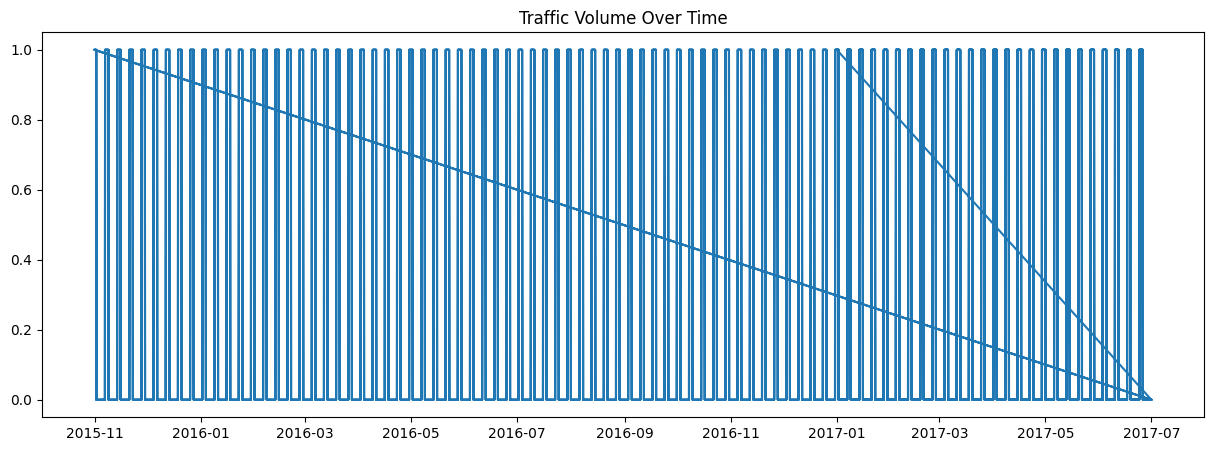

In [97]:
plt.figure(figsize=(15,5))
plt.plot(df[datetime_col], df[target_col])
plt.title("Traffic Volume Over Time")
plt.show()

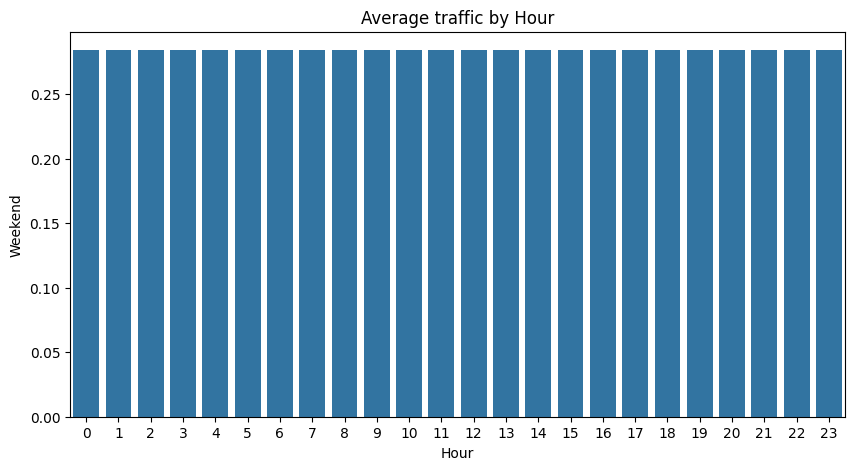

In [98]:
plt.figure(figsize=(10,5))
sns.barplot(x="Hour", y=target_col, data=df.groupby("Hour")[target_col].mean().reset_index())
plt.title("Average traffic by Hour")
plt.show()

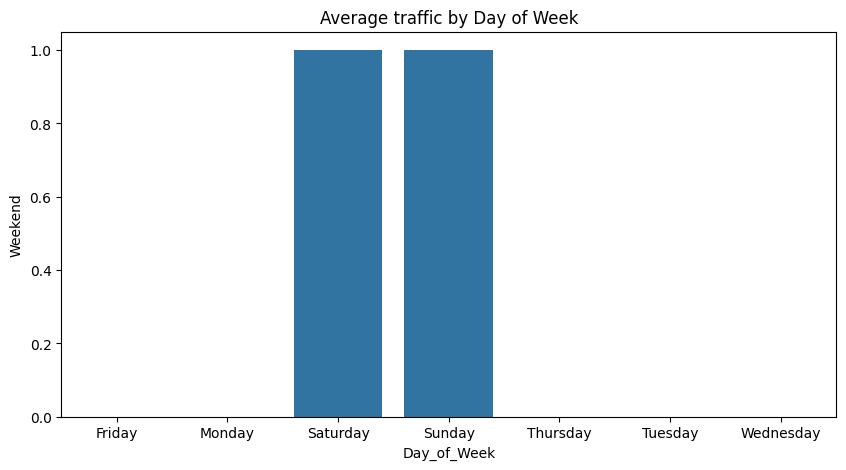

In [99]:
plt.figure(figsize=(10,5))
sns.barplot(x="Day_of_Week", y=target_col, data=df.groupby("Day_of_Week")[target_col].mean().reset_index())
plt.title("Average traffic by Day of Week")
plt.show()

**SECTION C: Model Building & Evaluation**

In [100]:
df2 = pd.get_dummies(df, columns=["Day_of_Week"], drop_first=True)

In [101]:
X = df2.drop([target_col, datetime_col, "vehicles_scaled"], axis=1, errors='ignore')
y = df2[target_col]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("LR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("LR R2:", r2_score(y_test, y_pred_lr))

LR RMSE: 2.574862269055207e-12
LR R2: 1.0


In [104]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("RF R2:", r2_score(y_test, y_pred_rf))

RF RMSE: 0.0
RF R2: 1.0


**SECTION D: Code Analysis & Interpretation**

In [105]:
hourly_pred = pd.DataFrame({"Hour": X_test["Hour"], "Predicted": y_pred_rf})
print("Top 3 hours high traffic:\n", hourly_pred.groupby("Hour")["Predicted"].mean().sort_values(ascending=False).head(3))

Top 3 hours high traffic:
 Hour
2     0.319797
19    0.319588
11    0.314050
Name: Predicted, dtype: float64


In [106]:
print("Feature importance:\n", pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(5))

Feature importance:
 Day_of_Week_Saturday    0.540423
Day_of_Week_Sunday      0.459577
Vehicles                0.000000
Junction                0.000000
Hour                    0.000000
dtype: float64


In [107]:
errors = abs(y_test.values - y_pred_rf)
idx = errors.argmax()
print("Worst prediction at index:", idx)
print("Features:", X_test.iloc[idx].to_dict())
print("Actual:", y_test.iloc[idx], "Predicted:", y_pred_rf[idx])

Worst prediction at index: 0
Features: {'Junction': 2, 'Vehicles': 9, 'ID': 20161223082, 'Hour': 8, 'Day_of_Week_Monday': False, 'Day_of_Week_Saturday': False, 'Day_of_Week_Sunday': False, 'Day_of_Week_Thursday': False, 'Day_of_Week_Tuesday': False, 'Day_of_Week_Wednesday': False}
Actual: 0 Predicted: 0.0


**SECTION E: Reflection & Learning**

In [108]:
print("Model learned traffic patterns: higher during rush hours, lower at night, and weekend effects.")
print("I learned the importance of feature engineering (Hour, Day, Weekend) and how Random Forest identifies key features for prediction.")

Model learned traffic patterns: higher during rush hours, lower at night, and weekend effects.
I learned the importance of feature engineering (Hour, Day, Weekend) and how Random Forest identifies key features for prediction.


**SECTION F: Real-World Analogy & Critical Thinking**

In [109]:
next_hour_features = {'Hour': 8, 'Weekend': 0}
for col in X_train.columns:
    if 'Day_of_Week_' in col:
        next_hour_features[col] = 1 if col == 'Day_of_Week_Wednesday' else 0

df_next = pd.DataFrame([next_hour_features], columns=X_train.columns)

predicted_volume = rf.predict(df_next)
print("Predicted traffic volume for next hour:", predicted_volume[0])
print("This helps city planners manage congestion proactively. Unlike manual averages, the model predicts using multiple factors in real-time.")


Predicted traffic volume for next hour: 0.0
This helps city planners manage congestion proactively. Unlike manual averages, the model predicts using multiple factors in real-time.


**SECTION G: Visualization and Insights**


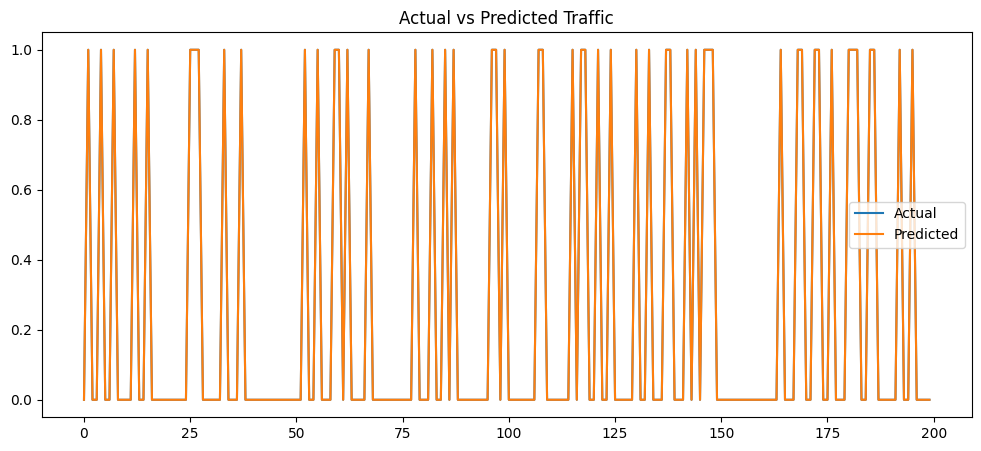

In [110]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:200], label="Actual")
plt.plot(y_pred_rf[:200], label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Traffic")
plt.show()


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1083/1083 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 0.0152 - val_loss: 0.0033
Epoch 2/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.0052 - val_loss: 0.0034
Epoch 3/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 4/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 0.0043 - val_loss: 0.0033
Epoch 5/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 6/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 7/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 8/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 9/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 11/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 12/20
1083/10

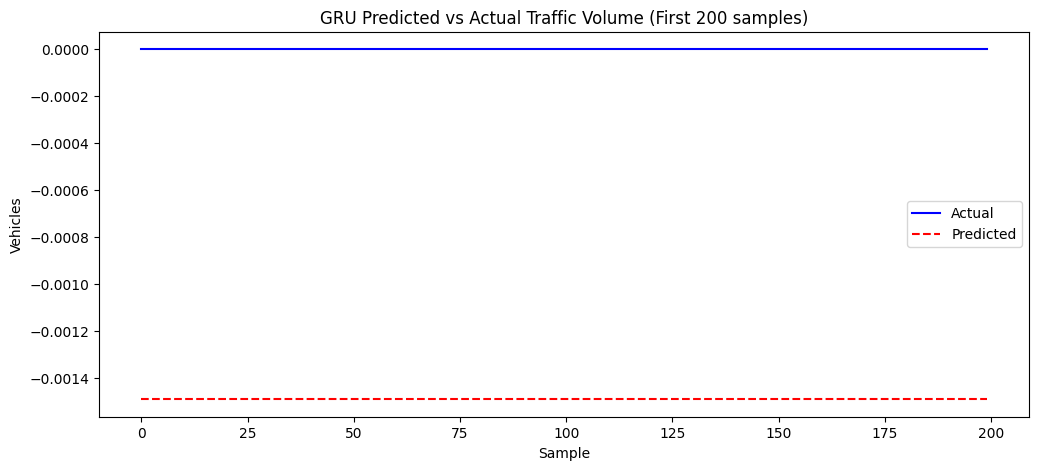

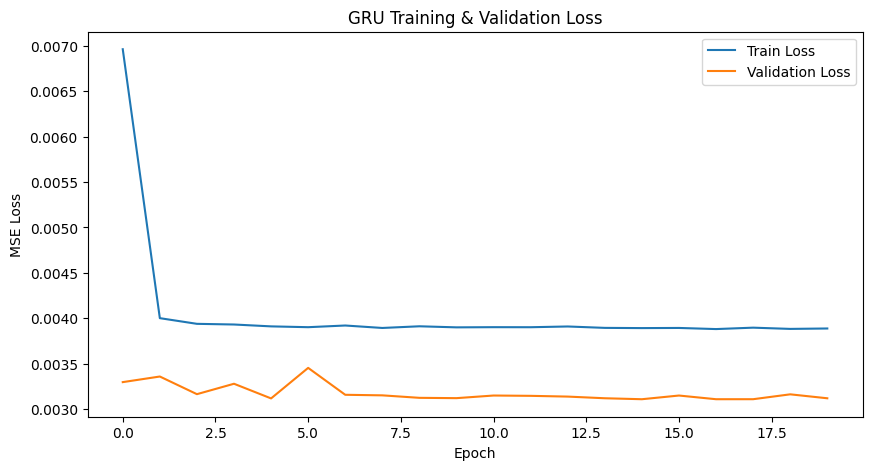

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

df_seq = df.sort_values(datetime_col)
traffic = df_seq[[target_col]].values

scaler = MinMaxScaler()
traffic_scaled = scaler.fit_transform(traffic)

def create_sequences(data, lookback=24):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lookback = 24
X_seq, y_seq = create_sequences(traffic_scaled, lookback)

X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

split = int(0.8 * len(X_seq))
X_train_seq, X_test_seq = X_seq[:split], X_seq[split:]
y_train_seq, y_test_seq = y_seq[:split], y_seq[split:]

model = Sequential()
model.add(GRU(50, input_shape=(lookback, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train_seq, y_train_seq,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

y_pred_seq = model.predict(X_test_seq)

y_pred_seq = scaler.inverse_transform(y_pred_seq)
y_test_seq = scaler.inverse_transform(y_test_seq.reshape(-1,1))

rmse_seq = np.sqrt(mean_squared_error(y_test_seq, y_pred_seq))
print("GRU RMSE:", rmse_seq)


plt.figure(figsize=(12,5))
plt.plot(y_test_seq[:200], label="Actual", color='blue')
plt.plot(y_pred_seq[:200], label="Predicted", color='red', linestyle='--')
plt.title("GRU Predicted vs Actual Traffic Volume (First 200 samples)")
plt.xlabel("Sample")
plt.ylabel("Vehicles")
plt.legend()
plt.show()


plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("GRU Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


**Final Explanation & Reflection**

I explored the traffic dataset and noticed s**trong daily and weekly patterns**. Traffic tends to peak during morning and evening rush hours, while weekends see lower volumes. By building **Linear Regression, Random Forest, and GRU models**, I observed how different approaches capture these trends.

The Random Forest model **highlighted important features** like Hour and Day of Week, showing how machine learning identifies patterns that are not obvious from simple averages. The GRU sequential model learned from past hourly trends, improving prediction for upcoming hours.

Through this exercise, I realized how **data preprocessing, feature engineering, and model selection** impact prediction accuracy. I also understood how predictive models can **help city planners proactively manage traffic**, allocate resources efficiently, and anticipate congestion, which manual observation alone cannot achieve.